## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
random.seed(42)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')# read the dataset 
df.head() # view the the 5 top rows 

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.info() # view the dataset info including the number of rows 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


294478 rows 

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique() # get the number of unique users

290584

d. The proportion of users converted.

In [5]:
df['converted'].mean() # get the proportion of users converted.

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
##find the number of all rows where users from "treatment" group and the landing page is old page or
##users from "control" group and the landing page is new page
df.query("group == 'treatment' and landing_page!='new_page'").count()+df.query("group == 'control' and landing_page=='new_page'").count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

no

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [7]:
# create new dataset df2, which includes only the users records where group and landing page are aligned 
df2=df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page'))]

In [8]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [9]:
# get the number of unique users
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [10]:
# check how many times each user id is repeated 
df2.user_id.value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
801490    1
799443    1
787157    1
793302    1
817882    1
842446    1
815835    1
805596    1
803549    1
809694    1
807647    1
895712    1
840399    1
836301    1
899810    1
834242    1
936604    1
934557    1
940702    1
938655    1
830144    1
828097    1
832195    1
838348    1
821956    1
         ..
734668    1
736717    1
730574    1
775632    1
771538    1
642451    1
773587    1
783828    1
785877    1
779734    1
781783    1
759256    1
726472    1
748999    1
746950    1
753093    1
751044    1
740803    1
738754    1
744897    1
742848    1
634271    1
632222    1
636316    1
630169    1
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

ID 773192  is repeated twice 

c. What is the row information for the repeat **user_id**? 

In [29]:
# get the records where user id = 773192 
df2.loc[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [28]:
# delete record with index= 2893 to eliminateon of the duplicate records 
df2 = df2.drop(2893)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [13]:
# get the conversion probability
(df2['converted']==1).mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
# get the conversion probability for users from the control group
control_converte_p=df2.query("group=='control'")['converted'].mean()

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
# get the conversion probability for users from the treatment group
treatment_converte_p=df2.query("group=='treatment'")['converted'].mean()

In [18]:
# calculate the diffrence between the conversion probability for users from the control group and treatment group 
actual_diff=treatment_converte_p-control_converte_p

In [20]:
# print the resule of the three variables above
print(control_converte_p,treatment_converte_p, actual_diff)

0.1203863045 0.118807247903 -0.00157905659769


d. What is the probability that an individual received the new page?

In [22]:
# calculate he probability that an individual received the new page by dividing the number of records with new page by the number of of unique users
df2.query("landing_page=='new_page'").count()/290584

user_id         0.500065
timestamp       0.500065
group           0.500065
landing_page    0.500065
converted       0.500065
dtype: float64

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**For individuals in the control group, the probability of conversion is 0.1204 while for individuals in the treatment group, the probability of conversion is 0.119
so the diffrence is small and in favor of the old page. I beleive there is no evidence that one page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_0= p_{new}-p_{old}$ <=0** 

**$H_1=p_{new}-p_{old}$ >0**
 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

  
**null and alternative hypothesis according to the assumption above:**

$H_0= p_{new}=p_{old}$ =0.1196

$H_1=p_{new}!=p_{old}$ 


Use a sample size for each page equal to the ones in **ab_data.csv**. <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
# the convert rate for p new
(df2['converted']==1).mean()

0.11959667567149027

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [26]:
# the convert rate for p old
(df2['converted']==1).mean()

0.11959667567149027

c. What is $n_{new}$?

In [30]:
# count the users in treatment group who converted 
df2.query("group=='treatment'")['converted'].count()

145310

d. What is $n_{old}$?

In [31]:
# count the users in control group who converted 
df2.query("group=='control'")['converted'].count()

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [32]:
# simulate distribution under the null hypothesis for the converate rate of the new page
sample_df=df2.sample(145310) # get sample size = n new
new_page_converted = []
for _ in range(10000): #10,000 iterations with bootstrapping
    bootsample = sample_df.sample(145310, replace = True)
    new_page_converted.append(bootsample.converted.mean())
    

In [34]:
# 10000 draws from the sampling distribution under the null
null_vals=np.random.normal(0.1196,np.std(new_page_converted),10000)

0.11951001307549378

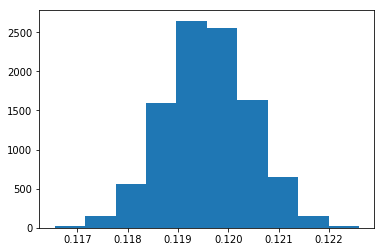

In [35]:
# show the histogram for the result 
plt.hist(null_vals);
sample_df.converted.mean()

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [36]:
# simulate distribution under the null hypothesis for the converate rate of the old page
sample_df=df2.sample(145274)# get sample size = n old
old_page_converted = []
for _ in range(10000):
    bootsample = sample_df.sample(145274, replace = True) #10,000 iterations with bootstrapping
    old_page_converted.append(bootsample.converted.mean())

In [37]:
# 10000 draws from the sampling distribution under the null
null_vals=np.random.normal(0.1196,np.std(old_page_converted),10000)


0.12072359816622383

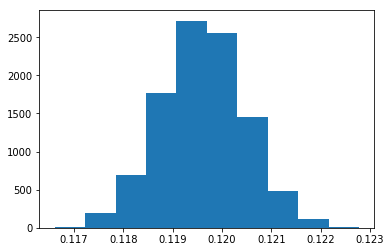

In [38]:
# show the histogram for the result 
plt.hist(null_vals);
sample_df.converted.mean()

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [39]:
# calculate 𝑝𝑛𝑒𝑤  - 𝑝𝑜𝑙𝑑 
0.11983345950037851-0.12022798298387874

-0.0003945234835002337

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [40]:
# the diffrence between new_page_converted & old_page_converted
p_diffs= []
for _ in range(10000): 
    p_diffs.append(np.array(new_page_converted)-np.array(old_page_converted))

In [41]:
# 10000 draws from the sampling distribution under the null
null_vals=np.random.normal(0.1196,np.std(p_diffs),10000)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

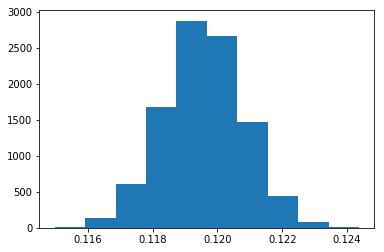

In [42]:
# show the histogram for the result 
plt.hist(null_vals);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [43]:
# compute p value
(null_vals > actual_diff).mean()

1.0

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**P value equals 1 (higher than the error rate), which means we fail to reject the null hypothesis and the convert rate for the new page is equal or less than the convert rate for the old page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [44]:
# calculate the number of conversions for the old page
convert_old = df2.query("group == 'control' and converted==1").count()
# calculate the number of conversions for the new page
convert_new = df2.query("group=='treatment'and converted==1").count()
# number of rows associated with the old page
n_old = df2.query("landing_page=='old_page'").count()
# number of rows associated with the new page
n_new = df2.query("landing_page=='new_page'").count()

In [97]:
# print all variables above 
convert_old, n_old, convert_new, n_new

(user_id         17489
 timestamp       17489
 group           17489
 landing_page    17489
 converted       17489
 dtype: int64, user_id         145274
 timestamp       145274
 group           145274
 landing_page    145274
 converted       145274
 dtype: int64, user_id         17264
 timestamp       17264
 group           17264
 landing_page    17264
 converted       17264
 dtype: int64, user_id         145310
 timestamp       145310
 group           145310
 landing_page    145310
 converted       145310
 dtype: int64)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [45]:
# caculate z score and p value using stats.proportions_ztest 
z_score, p_value = sm.stats.proportions_ztest([17489, 17264], [145274,145310 ])



In [46]:
# print the results  
z_score, p_value

(1.3109241984234394, 0.18988337448195103)

In [47]:
from scipy.stats import norm

norm.cdf(z_score),norm.ppf(1-(0.05/2))
# 0.90505831275902449 # Tells us how significant our z-score is
# 1.959963984540054 # Tells us what our critical value at 95% confidence is

(0.90505831275902449, 1.959963984540054)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**since z_score=1.3109241984234394 < 1.959963984540054, we fail to reject the null hypothesis and the convert rate for the new page is equal or less than the convert rate for the old page.This matches the previous finding .**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [49]:
# dummy variable for group
ab_page = pd.get_dummies(df2['group'])
df_new = df2.join(ab_page)# new dataset with 2 extra columns( control,treatment)
df_new.head()

,user_id,timestamp,group,landing_page,converted,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [50]:
df_new['intercept'] = 1
# fit logistic regression model where converted is the responce variable. Contol is the baseline for the group 
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'treatment']])
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [51]:
# get summary of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Dec 2018   Pseudo R-squ.:               8.077e-06
Time:                        18:07:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  

**p-value for the new page is 0.19. It is different because in part II, p-value was computed for the null hypothesis. In part III, we try to find out if the explanatory variable can be used to predict the response variable**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**in the current data set, there is no other useful variables to add, but if data about users is available, it is good to consider their effect on the response variable. However, adding additional terms makes our model difficult to explain.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns -  Provide the statistical output as well as a written response to answer this question.

In [131]:
# read countries data set
df3=pd.read_csv('countries.csv')

In [132]:
# merge both datasets using user id as index and save the result in df4 
df4=df2.set_index('user_id').join(df3.set_index('user_id'))

In [133]:
# check the 5 top rows of the new consolidated  dataset 
df4.head()

,timestamp,group,landing_page,converted,country
user_id,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,US


In [134]:
# dummy variable for country 
country_variable= pd.get_dummies(df4['country'])
df4= df4.join(country_variable)

In [135]:
# check the 5 top rows after adding the dummy variables 
df4.head()

,timestamp,group,landing_page,converted,country,CA,UK,US
user_id,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,US,0,0,1


In [136]:
# fit logistic regression model where converted is the responce variable. CA is the baselin for country 
df4['intercept'] = 1
log_mod = sm.Logit(df4['converted'], df4[['intercept','UK', 'US']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [128]:
# get summary of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 18 Dec 2018   Pseudo R-squ.:               1.521e-05
Time:                        18:52:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

**the p-value for country 2 or 3 is not significant, which means county variable can not be used to prdict the converte rate**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [139]:
# add group dummy variables to the same dataset that contains country dummy variables 
ab_page = pd.get_dummies(df4['group'])
df5=df4.join(ab_page)

In [141]:
df5.head()

,timestamp,group,landing_page,converted,country,CA,UK,US,intercept,control,treatment
user_id,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,US,0,0,1,1,1,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,US,0,0,1,1,1,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,US,0,0,1,1,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,US,0,0,1,1,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,US,0,0,1,1,1,0


In [143]:
# fit logistic regression model where converted is the responce variable. Three explanatory variables treatment or new page, UK and US country.
#CA is the baselin for country and control or old page is the baseline for group
log_mod = sm.Logit(df5['converted'], df5[['intercept', 'treatment','UK', 'US']])
results = log_mod.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 18 Dec 2018   Pseudo R-squ.:               2.323e-05
Time:                        19:00:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
treatment     -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

## Conclusion
**none of p-values associated with any explanatory variables are significant, so there is no evidance that the converte rate for the new page is higher and no variable in the dataset helps in pridicting the converte rate. The recommendation is to keep the old page or try to collect more helpful data about users. Practicaly speaking, running the experment for longer time without collecting more data about users would not change the result and the new page should be discarded** 


<a id='conclusions'></a>



## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [145]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0